<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01" target="_blank">
    <img src="LogosAndGifs/SN_web_lightmode.png" width="300" alt="Skills Network Logo"  />
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Machine Learning Prediction


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](LogosAndGifs/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](LogosAndGifs/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform Exploratory Data Analysis and Determine Training Labels

- Create a column for the class
- Standardize the data
- Split into training data and test data

Find Best Hyperparameters for SVM, Classification Trees, and Logistic Regression

- Find the method that performs best using test data

## Additional Achievements

I, Santiago Semensi, have taken further steps beyond the requirements of this course, by attempting and successfully achieving improvements in most of the predictive models. Additional graphs and visualizations were plotted to enhance the understanding of the data and the model performance. These efforts have contributed to a more comprehensive and insightful analysis.


## Import Libraries and Define Auxiliary Functions


We will import the following libraries for the lab


In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV, StratifiedKFold
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
# Classification report
from sklearn.metrics import classification_report
# Polynomial Features
from sklearn.preprocessing import PolynomialFeatures
# Bagging Classifier
from sklearn.ensemble import BaggingClassifier
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Recursive Feature Elimination
from sklearn.feature_selection import RFE

This function is to plot the confusion matrix.


In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


In [3]:
import requests
import io
import pandas as pd

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response = requests.get(URL1)
text1 = io.StringIO(response.text)
data = pd.read_csv(text1)

In [4]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


We'll load a dataframe with the encoded data so it's more suitable for feeding into a predictive model.

In [5]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = requests.get(URL2)
text2 = io.StringIO(resp2.text)
X = pd.read_csv(text2)

In [6]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [7]:
Y = data['Class'].to_numpy()

Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [8]:
# Standarizing the data
transform = preprocessing.StandardScaler()

# Fit the scaler to the data and transform it
X_standardized = transform.fit_transform(X)

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X_standardized, Y, test_size=0.2, random_state=2)

We can see we only have 18 test samples.


In [10]:
Y_test.shape

(18,)

## Logistic Regression


Logistic Regression is a linear model commonly used for binary classification tasks. We use GridSearchCV to find the best hyperparameters for our Logistic Regression model.

In the next cell, we perform the following steps:
1. Define hyperparameters for tuning the Logistic Regression model.
2. Create a Logistic Regression model.
3. Use GridSearchCV to find the best hyperparameters based on 10-fold cross-validation.
4. Fit the model on the training data.
5. Store the best hyperparameters and the best accuracy score in the `results` dictionary.
6. Calculate the accuracy on the test data.
7. Evaluate the model using a classification report.


In [11]:
# Parameters for Logistic Regression
logreg_parameters = [
    {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'], 'solver': ['lbfgs']},
    {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
]

# Create a logistic regression object
logreg = LogisticRegression(max_iter=5000)

# Create GridSearchCV object
logreg_cv = GridSearchCV(logreg, logreg_parameters, cv=10, scoring='accuracy')

# Fit the GridSearchCV object to find the best parameters
logreg_cv.fit(X_train, Y_train)

# Store the best model
best_model_logreg = logreg_cv.best_estimator_

# Make predictions
yhat_logreg = logreg_cv.predict(X_test)

# Calculate accuracy on the test data
accuracy_test_logreg = best_model_logreg.score(X_test, Y_test)

# Calculate accuracy on the training data
accuracy_train_logreg = best_model_logreg.score(X_train, Y_train)

# Dictionary to store results
results = {}

# Store the results
results['LogisticRegression'] = {
    'best_params': logreg_cv.best_params_,
    'best_score': logreg_cv.best_score_,
    'train_accuracy': accuracy_train_logreg,
    'test_accuracy': accuracy_test_logreg
}

# Print results
print("Tuned hyperparameters (best parameters):", logreg_cv.best_params_)
print("Accuracy (train):", accuracy_train_logreg)
print("Accuracy (test):", accuracy_test_logreg)

# Evaluate the model
print(classification_report(Y_test, yhat_logreg))


Tuned hyperparameters (best parameters): {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Accuracy (train): 0.8611111111111112
Accuracy (test): 0.8333333333333334
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



Let's look at the confusion matrix:


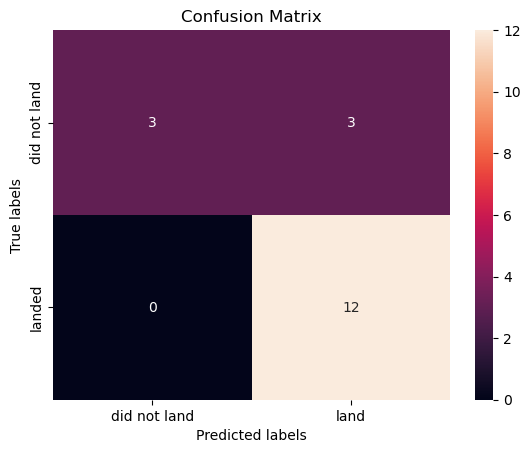

Accuracy (test): 0.8333333333333334


In [12]:
plot_confusion_matrix(Y_test,yhat_logreg)
print("Accuracy (test):", accuracy_test_logreg)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.

### Logistic Regression with Reduced Features

To improve the performance of our Logistic Regression model, we reduce the feature set based on feature importance analysis. We then use GridSearchCV to find the best hyperparameters for our Logistic Regression model on the reduced feature set.

To achieve this, we'll take the following steps:
1. Identify and drop unimportant features based on a threshold.
2. Standardize the reduced feature set.
3. Split the data into training and testing sets with reduced features.
4. Define and train the Logistic Regression model using GridSearchCV.
5. Evaluate the best model with reduced features.
6. Analyze the feature importance again after dropping unimportant features.

In [34]:
# Feature Importance Analysis
# Extract the coefficients from the best model
feature_names = X.columns
coefficients = best_model_logreg.coef_[0]

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute value of coefficients
feature_importance['AbsCoefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='AbsCoefficient', ascending=False)

# Display feature importance
print("Feature Importance:")
print(feature_importance[['Feature', 'Coefficient']])

# Export to CSV
feature_importance.to_csv('feature_importance.csv', index=False)


Feature Importance:
           Feature  Coefficient
82       Legs_True     0.353207
81      Legs_False    -0.353207
78   GridFins_True     0.046044
77  GridFins_False    -0.046044
4      ReusedCount     0.027678
..             ...          ...
27    Serial_B1003     0.000000
26    Serial_B0007     0.000000
25    Serial_B0005     0.000000
24    Serial_B0003     0.000000
41    Serial_B1019     0.000000

[83 rows x 2 columns]


In [14]:
# Identify features to drop based on a threshold
threshold = 0.01  # Set a threshold for feature importance
features_to_drop = feature_importance[feature_importance['AbsCoefficient'] < threshold]['Feature'].tolist()

# Drop unimportant features
X_reduced = X.drop(columns=features_to_drop)

# Standardize the reduced feature set
X_standardized_reduced = transform.fit_transform(X_reduced)

# Split the data into training and testing sets with reduced features
X_train_reduced, X_test_reduced, Y_train, Y_test = train_test_split(X_standardized_reduced, Y, test_size=0.2, random_state=42)

# Train the model using GridSearchCV with the same logreg object
logreg_red_cv = GridSearchCV(logreg, logreg_parameters, cv=10, scoring='accuracy')
logreg_red_cv.fit(X_train_reduced, Y_train)

# Store the best model
best_model_logreg_red = logreg_red_cv.best_estimator_

# Make predictions
yhat_logreg_red = logreg_red_cv.predict(X_test_reduced)

# Calculate accuracy on the test data
accuracy_test_logreg_red = best_model_logreg_red.score(X_test_reduced, Y_test)

# Calculate accuracy on the training data
accuracy_train_logreg_red = best_model_logreg_red.score(X_train_reduced, Y_train)

# Store the results
results['LogReg_Reduced'] = {
    'best_params': logreg_red_cv.best_params_,
    'best_score': logreg_red_cv.best_score_,
    'train_accuracy': accuracy_train_logreg_red,
    'test_accuracy': accuracy_test_logreg_red
}

# Print results
print("Tuned hyperparameters (best parameters) with reduced features:", logreg_red_cv.best_params_)
print("Accuracy (train) with reduced features:", accuracy_train_logreg_red)
print("Accuracy (test) with reduced features:", accuracy_test_logreg_red)

# Evaluate the model
print(classification_report(Y_test, yhat_logreg_red))

# Optional: Analyze feature importance again
coefficients_reduced = best_model_logreg_red.coef_[0]
feature_importance_reduced = pd.DataFrame({
    'Feature': X_reduced.columns,
    'Coefficient': coefficients_reduced
})
feature_importance_reduced['AbsCoefficient'] = np.abs(feature_importance_reduced['Coefficient'])
feature_importance_reduced = feature_importance_reduced.sort_values(by='AbsCoefficient', ascending=False)

print("Feature Importance after Dropping Unimportant Features:")
print(feature_importance_reduced[['Feature', 'Coefficient']])


Tuned hyperparameters (best parameters) with reduced features: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy (train) with reduced features: 0.8472222222222222
Accuracy (test) with reduced features: 0.9444444444444444
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.93      1.00      0.97        14

    accuracy                           0.94        18
   macro avg       0.97      0.88      0.91        18
weighted avg       0.95      0.94      0.94        18

Feature Importance after Dropping Unimportant Features:
          Feature  Coefficient
3      Legs_False    -0.133500
4       Legs_True     0.133500
1  GridFins_False    -0.120220
2   GridFins_True     0.120220
0     ReusedCount     0.112673


Let's plot a barchart to see the importance of this features

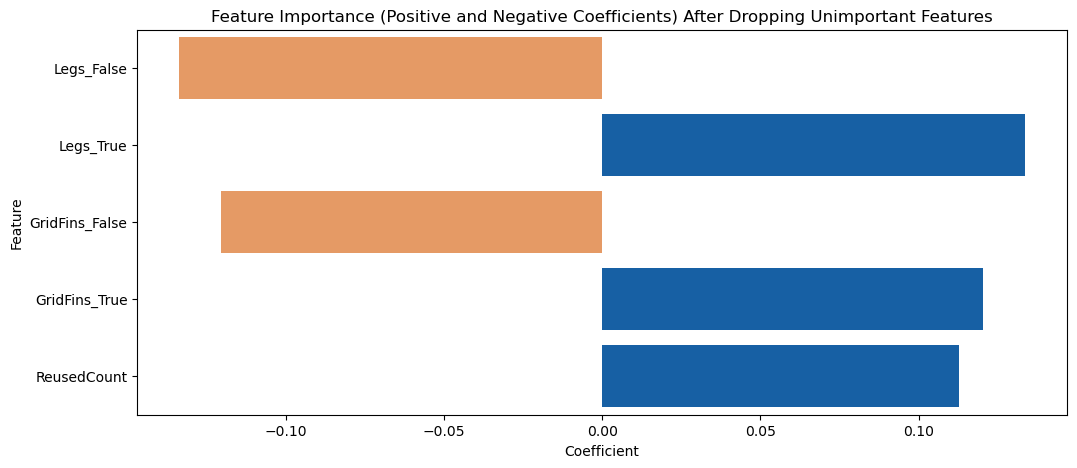

In [54]:
# Define a custom palette for positive and negative coefficients
custom_palette = ['#FA9750' if coef < 0 else '#0061BB' for coef in feature_importance_reduced['Coefficient']]

# Create the horizontal bar chart with the custom palette
plt.figure(figsize=(12, 5))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_reduced, palette=custom_palette)

# Add labels and title
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance (Positive and Negative Coefficients) After Dropping Unimportant Features')
plt.show()


The test accuracy improved! Now let's plot a new confusion matrix

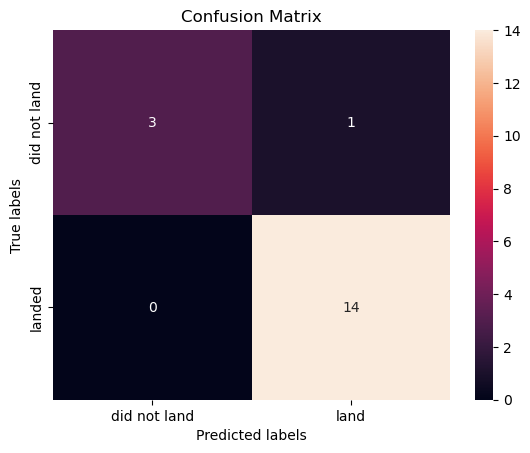

Accuracy (test): 0.9444444444444444


In [15]:
plot_confusion_matrix(Y_test,yhat_logreg_red)
print("Accuracy (test):", accuracy_test_logreg_red)

## Support Vector Machine


Support Vector Machines (SVM) are powerful classifiers that work well on a wide range of datasets. We use GridSearchCV to find the best hyperparameters for our SVM model.

In this section, we perform the following steps:
1. Define the parameter grid for the SVM model.
2. Create an SVM model.
3. Use GridSearchCV to find the best hyperparameters based on 10-fold cross-validation.
4. Fit the model on the training data.
5. Store the best hyperparameters, training accuracy, and test accuracy.
6. Evaluate the model using a classification report.

In [16]:
# Define the parameter grid
svm_parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

# Create an SVM object
svm = SVC()

# Create a GridSearchCV object
svm_cv = GridSearchCV(svm, svm_parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
svm_cv.fit(X_train, Y_train)

# Store the best model
best_model_svm = svm_cv.best_estimator_

# Make predictions
yhat_svm = svm_cv.predict(X_test)

# Calculate accuracy on the test data
accuracy_test_svm = best_model_svm.score(X_test, Y_test)

# Calculate accuracy on the training data
accuracy_train_svm = best_model_svm.score(X_train, Y_train)

# Store the results
results['SVM'] = {
    'best_params': svm_cv.best_params_,
    'best_score': svm_cv.best_score_,
    'train_accuracy': accuracy_train_svm,
    'test_accuracy': accuracy_test_svm
}

# Print results
print("Tuned hyperparameters (best parameters):", svm_cv.best_params_)
print("Accuracy (train):", accuracy_train_svm)
print("Accuracy (test):", accuracy_test_svm)

# Evaluate the model
print(classification_report(Y_test, yhat_svm))


Tuned hyperparameters (best parameters): {'C': 31.622776601683793, 'gamma': 0.03162277660168379, 'kernel': 'rbf'}
Accuracy (train): 1.0
Accuracy (test): 0.7777777777777778
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.81      0.93      0.87        14

    accuracy                           0.78        18
   macro avg       0.66      0.59      0.60        18
weighted avg       0.74      0.78      0.75        18



### Refined SVM Model with Grid Search

To further optimize our SVM model, we perform a more granular search around the best-found parameters using GridSearchCV.

In this section, we perform the following steps:
1. Define a refined parameter grid around the best found parameters for the SVM model.
2. Create an SVM model.
3. Use GridSearchCV to find the best hyperparameters based on 10-fold cross-validation.
4. Fit the model on the training data.
5. Store the best hyperparameters, training accuracy, and test accuracy.
6. Evaluate the model using a classification report.

In [17]:
# Define a refined parameter grid around the best-found parameters
refined_svm_parameters = {
    'C': np.linspace(0.5, 2.0, 10),  # More granular search around C=1.0
    'gamma': np.linspace(0.01, 0.1, 10),  # More granular search around gamma=0.031
    'kernel': ['sigmoid'],
    'class_weight': ['balanced']
}

# Create an SVM object
svm = SVC()

# Create a GridSearchCV object
svm_refined_cv = GridSearchCV(svm, refined_svm_parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
svm_refined_cv.fit(X_train, Y_train)

# Store the best model
best_model_svm_refined = svm_refined_cv.best_estimator_

# Make predictions
yhat_svm_refined = svm_refined_cv.predict(X_test)

# Calculate accuracy on the test data
accuracy_test_svm_refined = best_model_svm_refined.score(X_test, Y_test)

# Calculate accuracy on the training data
accuracy_train_svm_refined = best_model_svm_refined.score(X_train, Y_train)

# Store the results
results['SVM_Refined'] = {
    'best_params': svm_refined_cv.best_params_,
    'best_score': svm_refined_cv.best_score_,
    'train_accuracy': accuracy_train_svm_refined,
    'test_accuracy': accuracy_test_svm_refined
}

# Print results
print("Tuned hyperparameters (best parameters):", svm_refined_cv.best_params_)
print("Best cross-validated accuracy:", svm_refined_cv.best_score_)
print("Accuracy (train):", accuracy_train_svm_refined)
print("Accuracy (test):", accuracy_test_svm_refined)

# Evaluate the model
print(classification_report(Y_test, yhat_svm_refined))


Tuned hyperparameters (best parameters): {'C': 0.8333333333333333, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'sigmoid'}
Best cross-validated accuracy: 0.6660714285714286
Accuracy (train): 0.9027777777777778
Accuracy (test): 0.5555555555555556
              precision    recall  f1-score   support

           0       0.25      0.50      0.33         4
           1       0.80      0.57      0.67        14

    accuracy                           0.56        18
   macro avg       0.53      0.54      0.50        18
weighted avg       0.68      0.56      0.59        18



### SVM Model with Polynomial Features and Grid Search

To capture more complex relationships in the data, we generate polynomial features and use GridSearchCV to find the best hyperparameters for our SVM model on the polynomial features.

In this section, we perform the following steps:
1. Generate polynomial features.
2. Standardize the polynomial features.
3. Split the data into training and testing sets with polynomial features.
4. Train the SVM model using GridSearchCV.
5. Store the best hyperparameters, training accuracy, and test accuracy.
6. Evaluate the model using a classification report.

In [18]:
# Generate polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X)

# Standardize the polynomial features
scaler = preprocessing.StandardScaler()
X_poly_standardized = scaler.fit_transform(X_poly)

# Split the data into training and testing sets
X_train_poly, X_test_poly, Y_train_poly, Y_test_poly = train_test_split(X_poly_standardized, Y, test_size=0.2, random_state=42)

# Train the model again with polynomial features using GridSearchCV
svm_cv_poly = GridSearchCV(SVC(), refined_svm_parameters, cv=10)
svm_cv_poly.fit(X_train_poly, Y_train_poly)

# Store the best model
best_model_svm_poly = svm_cv_poly.best_estimator_

# Make predictions
yhat_svm_poly = svm_cv_poly.predict(X_test_poly)

# Calculate accuracy on the test data
accuracy_test_svm_poly = best_model_svm_poly.score(X_test_poly, Y_test_poly)

# Calculate accuracy on the training data
accuracy_train_svm_poly = best_model_svm_poly.score(X_train_poly, Y_train_poly)

# Store the results
results['SVM_Polynomial'] = {
    'best_params': svm_cv_poly.best_params_,
    'best_score': svm_cv_poly.best_score_,
    'train_accuracy': accuracy_train_svm_poly,
    'test_accuracy': accuracy_test_svm_poly
}

# Print results
print("Tuned hyperparameters (best parameters):", svm_cv_poly.best_params_)
print("Best cross-validated accuracy:", svm_cv_poly.best_score_)
print("Accuracy (train):", accuracy_train_svm_poly)
print("Accuracy (test):", accuracy_test_svm_poly)

# Evaluate the model
print(classification_report(Y_test_poly, yhat_svm_poly))


Tuned hyperparameters (best parameters): {'C': 0.6666666666666666, 'class_weight': 'balanced', 'gamma': 0.07, 'kernel': 'sigmoid'}
Best cross-validated accuracy: 0.8464285714285715
Accuracy (train): 0.7083333333333334
Accuracy (test): 0.6666666666666666
              precision    recall  f1-score   support

           0       0.38      0.75      0.50         4
           1       0.90      0.64      0.75        14

    accuracy                           0.67        18
   macro avg       0.64      0.70      0.62        18
weighted avg       0.78      0.67      0.69        18



### Bagging Classifier with SVM

To improve the performance of our SVM model, we use a Bagging Classifier. Bagging reduces variance and helps to avoid overfitting by training multiple models on different subsets of the training data and then aggregating their predictions.


In the next cells, we'll perform the following steps:
1. Create a BaggingClassifier with an SVM base estimator.
2. Train the BaggingClassifier on the training data.
3. Store the training accuracy and test accuracy.
4. Evaluate the model using a classification report.

In [19]:
# Create a BaggingClassifier with SVM
bagging_svm = BaggingClassifier(base_estimator=SVC(kernel='sigmoid', C=1.0, gamma=0.03162277660168379, class_weight='balanced'), n_estimators=10, random_state=42)
bagging_svm.fit(X_train, Y_train)

# Make predictions
yhat_bagging = bagging_svm.predict(X_test)

# Calculate accuracy on the test data
accuracy_test_bagging = bagging_svm.score(X_test, Y_test)

# Calculate accuracy on the training data
accuracy_train_bagging = bagging_svm.score(X_train, Y_train)

# Store the results
results['Bagging_SVM'] = {
    'train_accuracy': accuracy_train_bagging,
    'test_accuracy': accuracy_test_bagging
}

# Print results
print("Accuracy (train):", accuracy_train_bagging)
print("Accuracy (test):", accuracy_test_bagging)

# Evaluate the model
print(classification_report(Y_test, yhat_bagging))


Accuracy (train): 0.75
Accuracy (test): 0.6111111111111112
              precision    recall  f1-score   support

           0       0.29      0.50      0.36         4
           1       0.82      0.64      0.72        14

    accuracy                           0.61        18
   macro avg       0.55      0.57      0.54        18
weighted avg       0.70      0.61      0.64        18



c:\Users\Santi\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Based on the reports of the different attempts to improve the model, we can say that the original hyperparameter tuning was close to optimal and that the next attempts didn't show much improvement. Now, we'll plot a confusion matrix from the first SVM we created.

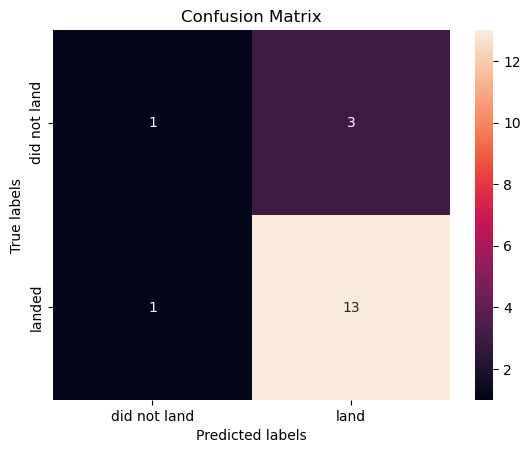

Accuracy (test): 0.7777777777777778


In [20]:
plot_confusion_matrix(Y_test,yhat_svm)
print("Accuracy (test):", svm_cv.best_estimator_.score(X_test,Y_test))

## Decision Tree Classifier


Decision Tree Classifiers are a popular choice for classification tasks due to their simplicity and interpretability. They work by recursively splitting the data based on feature values, which can capture complex decision boundaries. We will use GridSearchCV to find the best hyperparameters for our Decision Tree model.

For this model, we perform the following steps:
1. Define the parameter grid for the Decision Tree model.
2. Create a Decision Tree model.
3. Use GridSearchCV with KFold cross-validation to find the best hyperparameters.
4. Fit the model on the training data.
5. Store the best hyperparameters, training accuracy, and test accuracy.
6. Evaluate the model using a classification report.

In [21]:
# Define the parameter grid
tree_parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1, 10)],
    'max_features': ['log2', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Create a Decision Tree model
tree = DecisionTreeClassifier()

# Create a GridSearchCV object
tree_cv = GridSearchCV(tree, tree_parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
tree_cv.fit(X_train, Y_train)

# Store the best model
best_tree_model = tree_cv.best_estimator_

# Make predictions
yhat_tree = best_tree_model.predict(X_test)

# Calculate accuracy on the test data
accuracy_test_tree = best_tree_model.score(X_test, Y_test)

# Calculate accuracy on the training data
accuracy_train_tree = best_tree_model.score(X_train, Y_train)

# Store the results
results['DecisionTree'] = {
    'best_params': tree_cv.best_params_,
    'best_score': tree_cv.best_score_,
    'train_accuracy': accuracy_train_tree,
    'test_accuracy': accuracy_test_tree
}

# Print results
print("Tuned hyperparameters (best parameters):", tree_cv.best_params_)
print("Best cross-validated accuracy:", tree_cv.best_score_)
print("Accuracy (train):", accuracy_train_tree)
print("Accuracy (test):", accuracy_test_tree)

# Evaluate the model
print(classification_report(Y_test, yhat_tree))


Tuned hyperparameters (best parameters): {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best cross-validated accuracy: 0.7678571428571428
Accuracy (train): 0.8611111111111112
Accuracy (test): 0.4444444444444444
              precision    recall  f1-score   support

           0       0.12      0.25      0.17         4
           1       0.70      0.50      0.58        14

    accuracy                           0.44        18
   macro avg       0.41      0.38      0.38        18
weighted avg       0.57      0.44      0.49        18



### Decision Tree Classifier with Randomized Search

To further optimize our Decision Tree Classifier, we use RandomizedSearchCV. This approach samples a specified number of hyperparameter combinations from the grid, making it more efficient than GridSearchCV for large parameter spaces.

We'll perform the following steps:
1. Define a refined parameter grid for the Decision Tree model.
2. Use RandomizedSearchCV with KFold cross-validation to find the best hyperparameters.
3. Fit the model on the training data.
4. Store the best hyperparameters, training accuracy, and test accuracy.
5. Evaluate the model using a classification report.


In [22]:
# Refined parameter grid
random_tree_parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1, 10)],
    'max_features': ['log2', 'sqrt', None],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'min_samples_split': [2, 5, 10, 15, 20]
}

# Create a RandomizedSearchCV object
tree_random = RandomizedSearchCV(tree, random_tree_parameters, cv=10, n_iter=100, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV object to find the best parameters
tree_random.fit(X_train, Y_train)

# Store the best model
rand_best_tree_model = tree_random.best_estimator_

# Make predictions
yhat_tree_random = rand_best_tree_model.predict(X_test)

# Calculate accuracy on the test data
accuracy_test_tree_random = rand_best_tree_model.score(X_test, Y_test)

# Calculate accuracy on the training data
accuracy_train_tree_random = rand_best_tree_model.score(X_train, Y_train)

# Store the results
results['D_Tree_Randomized'] = {
    'best_params': tree_random.best_params_,
    'best_score': tree_random.best_score_,
    'train_accuracy': accuracy_train_tree_random,
    'test_accuracy': accuracy_test_tree_random
}

# Print results
print("Tuned hyperparameters (best parameters):", tree_random.best_params_)
print("Best cross-validated accuracy:", tree_random.best_score_)
print("Accuracy (train):", accuracy_train_tree_random)
print("Accuracy (test):", accuracy_test_tree_random)

# Evaluate the model
print(classification_report(Y_test, yhat_tree_random))


Tuned hyperparameters (best parameters): {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 6, 'criterion': 'gini'}
Best cross-validated accuracy: 0.7357142857142857
Accuracy (train): 0.8472222222222222
Accuracy (test): 0.6666666666666666
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.75      0.86      0.80        14

    accuracy                           0.67        18
   macro avg       0.38      0.43      0.40        18
weighted avg       0.58      0.67      0.62        18



### Decision Tree Classifier with Polynomial Features and Randomized Search

To further explore the performance of our Decision Tree Classifier, we generate polynomial features and use RandomizedSearchCV to find the best hyperparameters.

In this section, we perform the following steps:
1. Generate polynomial features.
2. Split the data into training and testing sets with polynomial features.
3. Use RandomizedSearchCV with KFold cross-validation to find the best hyperparameters.
4. Fit the model on the training data.
5. Store the best hyperparameters, training accuracy, and test accuracy.
6. Evaluate the model using a classification report.

In [23]:
# Generate polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X)

# Split the data
X_train_poly, X_test_poly, Y_train_poly, Y_test_poly = train_test_split(X_poly, Y, test_size=0.2, random_state=42)

# Fit the RandomizedSearchCV object to find the best parameters on the polynomial features
tree_cv_poly = RandomizedSearchCV(tree, random_tree_parameters, cv=10, n_iter=100, random_state=42, n_jobs=-1)
tree_cv_poly.fit(X_train_poly, Y_train_poly)

# Store the best model
best_tree_model_poly = tree_cv_poly.best_estimator_

# Make predictions
yhat_tree_poly = best_tree_model_poly.predict(X_test_poly)

# Calculate accuracy on the test data
accuracy_test_tree_poly = best_tree_model_poly.score(X_test_poly, Y_test_poly)

# Calculate accuracy on the training data
accuracy_train_tree_poly = best_tree_model_poly.score(X_train_poly, Y_train_poly)

# Store the results
results['D_Tree_Polynomial'] = {
    'best_params': tree_cv_poly.best_params_,
    'best_score': tree_cv_poly.best_score_,
    'train_accuracy': accuracy_train_tree_poly,
    'test_accuracy': accuracy_test_tree_poly
}

# Print results
print("Tuned hyperparameters (best parameters):", tree_cv_poly.best_params_)
print("Best cross-validated accuracy:", tree_cv_poly.best_score_)
print("Accuracy (train):", accuracy_train_tree_poly)
print("Accuracy (test):", accuracy_test_tree_poly)

# Evaluate the model
print(classification_report(Y_test_poly, yhat_tree_poly))


Tuned hyperparameters (best parameters): {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_depth': 8, 'criterion': 'gini'}
Best cross-validated accuracy: 0.875
Accuracy (train): 0.8194444444444444
Accuracy (test): 0.8888888888888888
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.93      0.93      0.93        14

    accuracy                           0.89        18
   macro avg       0.84      0.84      0.84        18
weighted avg       0.89      0.89      0.89        18



### Random Forest Classifier with Randomized Search

Random Forest Classifiers are an ensemble method that combines multiple decision trees to improve predictive performance and control overfitting. We use RandomizedSearchCV to find the best hyperparameters for our Random Forest model.

In this section, we perform the following steps:
1. Define the parameter grid for the Random Forest model.
2. Use RandomizedSearchCV with KFold cross-validation to find the best hyperparameters.
3. Fit the model on the training data.
4. Store the best hyperparameters, training accuracy, and test accuracy.
5. Evaluate the model using a classification report.

In [24]:
# Define parameter grid for Random Forest
parameters_rf = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['log2', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)

# Create a RandomizedSearchCV object
rf_cv = RandomizedSearchCV(rf, parameters_rf, cv=10, n_iter=100, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV object to find the best parameters
rf_cv.fit(X_train, Y_train)

# Store the best model
best_rf_model = rf_cv.best_estimator_

# Make predictions
yhat_rf = best_rf_model.predict(X_test)

# Calculate accuracy on the test data
accuracy_test_rf = best_rf_model.score(X_test, Y_test)

# Calculate accuracy on the training data
accuracy_train_rf = best_rf_model.score(X_train, Y_train)

# Store the results
results['RandomForest'] = {
    'best_params': rf_cv.best_params_,
    'best_score': rf_cv.best_score_,
    'train_accuracy': accuracy_train_rf,
    'test_accuracy': accuracy_test_rf
}

# Print results
print("Tuned hyperparameters (best parameters):", rf_cv.best_params_)
print("Best cross-validated accuracy:", rf_cv.best_score_)
print("Accuracy (train):", accuracy_train_rf)
print("Accuracy (test):", accuracy_test_rf)

# Evaluate the model
print(classification_report(Y_test, yhat_rf))


Tuned hyperparameters (best parameters): {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini'}
Best cross-validated accuracy: 0.7535714285714286
Accuracy (train): 1.0
Accuracy (test): 0.7222222222222222
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.76      0.93      0.84        14

    accuracy                           0.72        18
   macro avg       0.38      0.46      0.42        18
weighted avg       0.59      0.72      0.65        18



From all the methods we tried to improve the Decission Tree Classifier, we can come to the conclusion that the model with the best performance was the one with Polynomial Features. Let's plot a confusion matrix with this model:


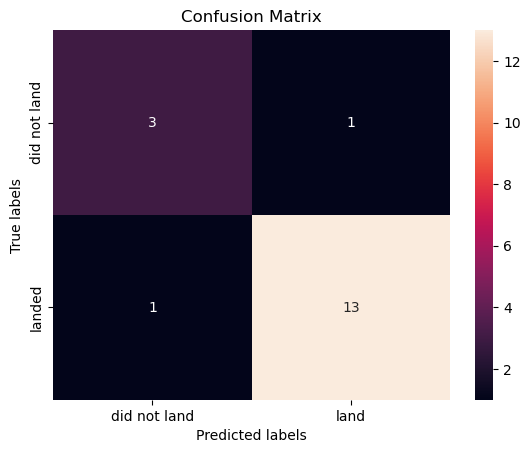

Accuracy (test): 0.8888888888888888


In [25]:
plot_confusion_matrix(Y_test_poly,yhat_tree_poly)
print("Accuracy (test):", best_tree_model_poly.score(X_test_poly,Y_test_poly))

## K Nearest Neighbors


K-Nearest Neighbors (KNN) is a simple, instance-based learning algorithm used for classification tasks. We use GridSearchCV to find the best hyperparameters for our KNN model.

In this section, we perform the following steps:
1. Define the parameter grid for the KNN model.
2. Use GridSearchCV with KFold cross-validation to find the best hyperparameters.
3. Fit the model on the training data.
4. Store the best hyperparameters, training accuracy, and test accuracy.
5. Evaluate the model using a classification report.


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
parameters_knn = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create a KNeighborsClassifier object
KNN = KNeighborsClassifier()

# Create a GridSearchCV object
knn_cv = GridSearchCV(KNN, parameters_knn, cv=10)

# Fit the GridSearchCV object to find the best parameters
knn_cv.fit(X_train, Y_train)

# Store the best model
best_knn_model = knn_cv.best_estimator_

# Make predictions
yhat_knn = best_knn_model.predict(X_test)

# Calculate accuracy on the test data
accuracy_test_knn = best_knn_model.score(X_test, Y_test)

# Calculate accuracy on the training data
accuracy_train_knn = best_knn_model.score(X_train, Y_train)

# Store the results
results['KNN'] = {
    'best_params': knn_cv.best_params_,
    'best_score': knn_cv.best_score_,
    'train_accuracy': accuracy_train_knn,
    'test_accuracy': accuracy_test_knn
}

# Print results
print("Tuned hyperparameters (best parameters):", knn_cv.best_params_)
print("Best cross-validated accuracy:", knn_cv.best_score_)
print("Accuracy (train):", accuracy_train_knn)
print("Accuracy (test):", accuracy_test_knn)

# Evaluate the model
print(classification_report(Y_test, yhat_knn))


Tuned hyperparameters (best parameters): {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
Best cross-validated accuracy: 0.6821428571428572
Accuracy (train): 0.8472222222222222
Accuracy (test): 0.6111111111111112
              precision    recall  f1-score   support

           0       0.29      0.50      0.36         4
           1       0.82      0.64      0.72        14

    accuracy                           0.61        18
   macro avg       0.55      0.57      0.54        18
weighted avg       0.70      0.61      0.64        18



### K-Nearest Neighbors with Recursive Feature Elimination (RFE)

To improve the performance of our K-Nearest Neighbors (KNN) model, we use Recursive Feature Elimination (RFE) with a Logistic Regression estimator to select the top features. We then use GridSearchCV to find the best hyperparameters for our KNN model on the selected features.

In this section, we perform the following steps:
1. Use RFE with a Logistic Regression estimator to select the top features.
2. Transform the data to the selected features.
3. Use GridSearchCV with KFold cross-validation to find the best hyperparameters.
4. Fit the model on the training data.
5. Store the best hyperparameters, training accuracy, and test accuracy.
6. Evaluate the model using a classification report.

In [27]:
# Use RFE with a Logistic Regression estimator to select the top features
selector = RFE(estimator=LogisticRegression(max_iter=5000), n_features_to_select=10)
selector = selector.fit(X_train, Y_train)

# Transform the data to the selected features
X_train_rfe = selector.transform(X_train)
X_test_rfe = selector.transform(X_test)

# Fit the GridSearchCV object to find the best parameters on the selected features
knn_cv.fit(X_train_rfe, Y_train)

# Store the best model
best_knn_model_rfe = knn_cv.best_estimator_

# Make predictions
yhat_knn_rfe = best_knn_model_rfe.predict(X_test_rfe)

# Calculate accuracy on the test data
accuracy_test_knn_rfe = best_knn_model_rfe.score(X_test_rfe, Y_test)

# Calculate accuracy on the training data
accuracy_train_knn_rfe = best_knn_model_rfe.score(X_train_rfe, Y_train)

# Store the results
results['KNN_RFE'] = {
    'best_params': knn_cv.best_params_,
    'best_score': knn_cv.best_score_,
    'train_accuracy': accuracy_train_knn_rfe,
    'test_accuracy': accuracy_test_knn_rfe
}

# Print results
print("Tuned hyperparameters (best parameters):", knn_cv.best_params_)
print("Best cross-validated accuracy:", knn_cv.best_score_)
print("Accuracy (train):", accuracy_train_knn_rfe)
print("Accuracy (test):", accuracy_test_knn_rfe)

# Evaluate the model
print(classification_report(Y_test, yhat_knn_rfe))


Tuned hyperparameters (best parameters): {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
Best cross-validated accuracy: 0.7910714285714286
Accuracy (train): 0.8333333333333334
Accuracy (test): 0.7222222222222222
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.76      0.93      0.84        14

    accuracy                           0.72        18
   macro avg       0.38      0.46      0.42        18
weighted avg       0.59      0.72      0.65        18



### K-Nearest Neighbors with Stratified K-Fold Cross-Validation

To improve the performance of our K-Nearest Neighbors (KNN) model, we use Stratified K-Fold Cross-Validation to ensure that each fold of the dataset has the same proportion of observations with a given label. We then use GridSearchCV to find the best hyperparameters for our KNN model.

In this section, we perform the following steps:
1. Define StratifiedKFold cross-validation.
2. Use GridSearchCV with StratifiedKFold cross-validation to find the best hyperparameters.
3. Fit the model on the training data.
4. Store the best hyperparameters, training accuracy, and test accuracy.
5. Evaluate the model using a classification report.

In [28]:
# Define StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Create a GridSearchCV object with StratifiedKFold
knn_cv_kfold = GridSearchCV(KNN, parameters_knn, cv=cv)
knn_cv_kfold.fit(X_train, Y_train)

# Store the best model
best_knn_model_kfold = knn_cv_kfold.best_estimator_

# Make predictions
yhat_knn_kfold = best_knn_model_kfold.predict(X_test)

# Calculate accuracy on the test data
accuracy_test_knn_kfold = best_knn_model_kfold.score(X_test, Y_test)

# Calculate accuracy on the training data
accuracy_train_knn_kfold = best_knn_model_kfold.score(X_train, Y_train)

# Store the results
results['KNN_StratifiedKFold'] = {
    'best_params': knn_cv_kfold.best_params_,
    'best_score': knn_cv_kfold.best_score_,
    'train_accuracy': accuracy_train_knn_kfold,
    'test_accuracy': accuracy_test_knn_kfold
}

# Print results
print("Tuned hyperparameters (best parameters):", knn_cv_kfold.best_params_)
print("Best cross-validated accuracy:", knn_cv_kfold.best_score_)
print("Accuracy (train):", accuracy_train_knn_kfold)
print("Accuracy (test):", accuracy_test_knn_kfold)

# Evaluate the model
print(classification_report(Y_test, yhat_knn_kfold))

Tuned hyperparameters (best parameters): {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1}
Best cross-validated accuracy: 0.6660714285714285
Accuracy (train): 0.7222222222222222
Accuracy (test): 0.5555555555555556
              precision    recall  f1-score   support

           0       0.17      0.25      0.20         4
           1       0.75      0.64      0.69        14

    accuracy                           0.56        18
   macro avg       0.46      0.45      0.45        18
weighted avg       0.62      0.56      0.58        18



### Bagging Classifier with KNN

To improve the performance of our K-Nearest Neighbors (KNN) model, we use a Bagging Classifier. Bagging reduces variance and helps to avoid overfitting by training multiple models on different subsets of the training data and then aggregating their predictions.

In this section, we perform the following steps:
1. Create a BaggingClassifier with a KNN base estimator.
2. Train the BaggingClassifier on the training data.
3. Store the training accuracy and test accuracy.
4. Evaluate the model using a classification report.

In [29]:
# Create a BaggingClassifier with KNN
bagging_knn = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=10, p=1), n_estimators=10, random_state=42)
bagging_knn.fit(X_train, Y_train)

# Make predictions
yhat_bagging_knn = bagging_knn.predict(X_test)

# Calculate accuracy on the test data
accuracy_test_bagging_knn = bagging_knn.score(X_test, Y_test)

# Calculate accuracy on the training data
accuracy_train_bagging_knn = bagging_knn.score(X_train, Y_train)

# Store the results
results['Bagging_KNN'] = {
    'train_accuracy': accuracy_train_bagging_knn,
    'test_accuracy': accuracy_test_bagging_knn
}

# Print results
print("Accuracy (train) with bagging:", accuracy_train_bagging_knn)
print("Accuracy (test) with bagging:", accuracy_test_bagging_knn)

# Evaluate the model
print(classification_report(Y_test, yhat_bagging_knn))

c:\Users\Santi\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy (train) with bagging: 0.7222222222222222
Accuracy (test) with bagging: 0.5555555555555556
              precision    recall  f1-score   support

           0       0.17      0.25      0.20         4
           1       0.75      0.64      0.69        14

    accuracy                           0.56        18
   macro avg       0.46      0.45      0.45        18
weighted avg       0.62      0.56      0.58        18



Since none of the techniques improve the accuracy, we can plot the confusion matrix with the original KNN:


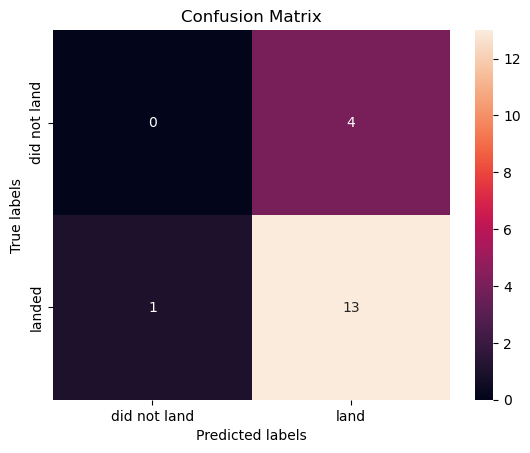

Accuracy (test): 0.7222222222222222


In [30]:
plot_confusion_matrix(Y_test,yhat_knn_rfe)
print("Accuracy (test):", best_knn_model_rfe.score(X_test_rfe,Y_test))

## Let's compare models


Find the method performs best:


In [31]:
# Creating a DataFrame from the results dictionary
results_df = pd.DataFrame(results).T
results_df = results_df[['best_params', 'best_score', 'train_accuracy', 'test_accuracy']]
results_df = results_df.rename(columns={
    'best_params': 'Best Hyperparameters',
    'best_score': 'Best CV Accuracy',
    'train_accuracy': 'Train Accuracy',
    'test_accuracy': 'Test Accuracy'
})

# Display the summary table
results_df

,Best Hyperparameters,Best CV Accuracy,Train Accuracy,Test Accuracy
LogisticRegression,"{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}",0.860714,0.861111,0.833333
LogReg_Reduced,"{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}",0.846429,0.847222,0.944444
SVM,"{'C': 31.622776601683793, 'gamma': 0.031622776...",0.739286,1.0,0.777778
SVM_Refined,"{'C': 0.8333333333333333, 'class_weight': 'bal...",0.666071,0.902778,0.555556
SVM_Polynomial,"{'C': 0.6666666666666666, 'class_weight': 'bal...",0.846429,0.708333,0.666667
Bagging_SVM,NaN,NaN,0.75,0.611111
DecisionTree,"{'criterion': 'entropy', 'max_depth': 8, 'max_...",0.767857,0.861111,0.444444
D_Tree_Randomized,"{'splitter': 'best', 'min_samples_split': 10, ...",0.735714,0.847222,0.666667
D_Tree_Polynomial,"{'splitter': 'best', 'min_samples_split': 10, ...",0.875,0.819444,0.888889
RandomForest,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.753571,1.0,0.722222


We can also plot a bar chart that shows both <code>Train Accuracy</code> and <code>Test Accuracy</code>. This can help us understand if a model is overfitting (high train accuracy but low test accuracy).

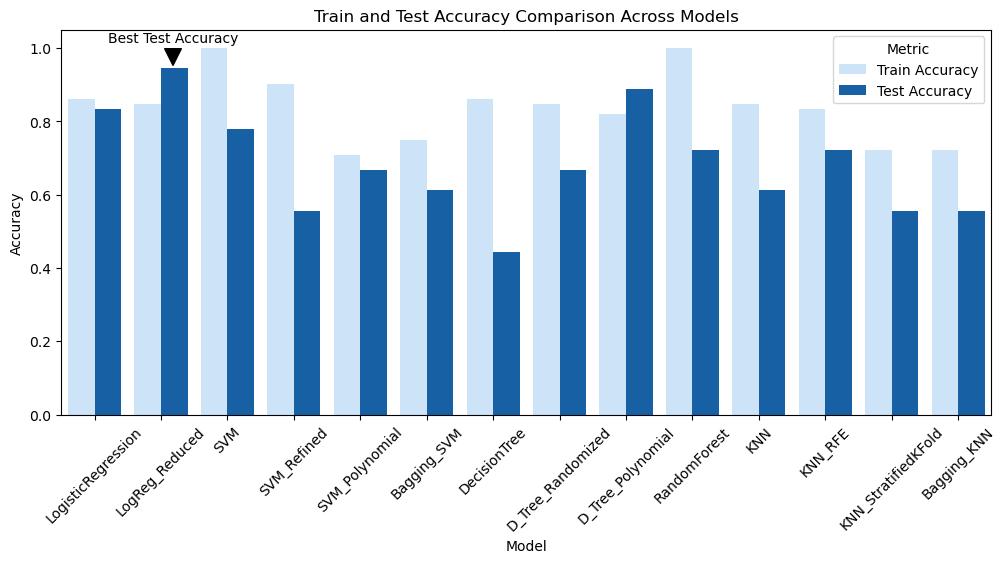

In [55]:
# Define custom colors for the bars
palette = {
    'Train Accuracy': '#C5E3FF',
    'Test Accuracy': '#0061BB'
}

# Plot the bar chart with custom colors
plt.figure(figsize=(12, 5))
ax = sns.barplot(x='Model', y='Accuracy', hue='Metric', data=results_melted, palette=palette)

# Add annotation for best test accuracy
for i in range(len(results_df)):
    if results_df['Model'][i] == best_model:
        ax.annotate('Best Test Accuracy',
                    xy=(i + 0.18, best_test_accuracy + 0.005),
                    xytext=(i + 0.18, best_test_accuracy + 0.07),
                    arrowprops=dict(facecolor='black', shrink=0.05),
                    ha='center')

plt.title('Train and Test Accuracy Comparison Across Models')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.show()


## Authors


[Santiago Semensi](www.linkedin.com/in/santiago-semensi-513842228) Has a Bachelor's degree in Industrial Design, student of the IBM Data Science Professional Certificate program.

[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2024-02-24        | 1.1     | Santiago Semensi| Completed tasks and improve performance on predictive models|
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
